[YYYYMMDD]

# 2. Model 4

autoarima seasonal

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
import pmdarima
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
ts2 = joblib.load(PATH_MODEL+'ramal_1:92.pkl')

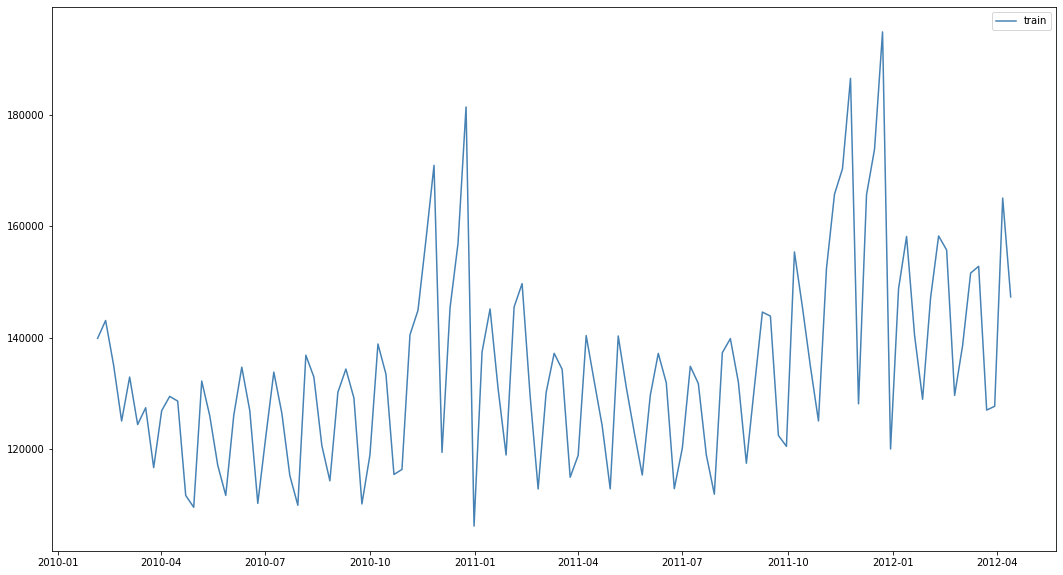

In [4]:
ts2.plot()

## Model 1

In [31]:
arima_model1 = pmdarima.arima.auto_arima(ts2.data, d = 1, max_d = 2
                         ,start_p = 0, max_p = 4
                         ,start_q = 0, max_q = 4
                         ,D = 1, max_D = 3
                         ,start_P = 0, max_P = 4
                         ,start_Q = 0, max_Q = 4
                         ,m = 5
                         ,seasonal = True
                         ,startionary = False
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 50)


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Best model:  ARIMA(3,1,0)(0,1,1)[5]          
Total fit time: 2.823 seconds


In [32]:
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 5)   Log Likelihood               -1221.931
Date:                             Wed, 24 Aug 2022   AIC                           2453.863
Time:                                     16:01:20   BIC                           2467.320
Sample:                                          0   HQIC                          2459.320
                                             - 115                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4278      0.069     -6.217      0.000      -0.563      -0.293
ar.L2         -0.4627      0.087     -5.314      0.000      -0.633      -0.292
ar.L3         -0.4010      0.064     -6.312      0.000      -0.526      -0.276
ma.S.L5       -0.8382      0.074    -11.311      0.000      -0.983      -0.693
sigma2      3.123e+08   3.44e-11   9.08e+18      0.000    3.12e+08    3.12e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 9.31
Prob(Q):                              0.49   Prob(JB):                         0.01
Heteroskedasticity (H):               0.97   Skew:                            -0.61
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Eval

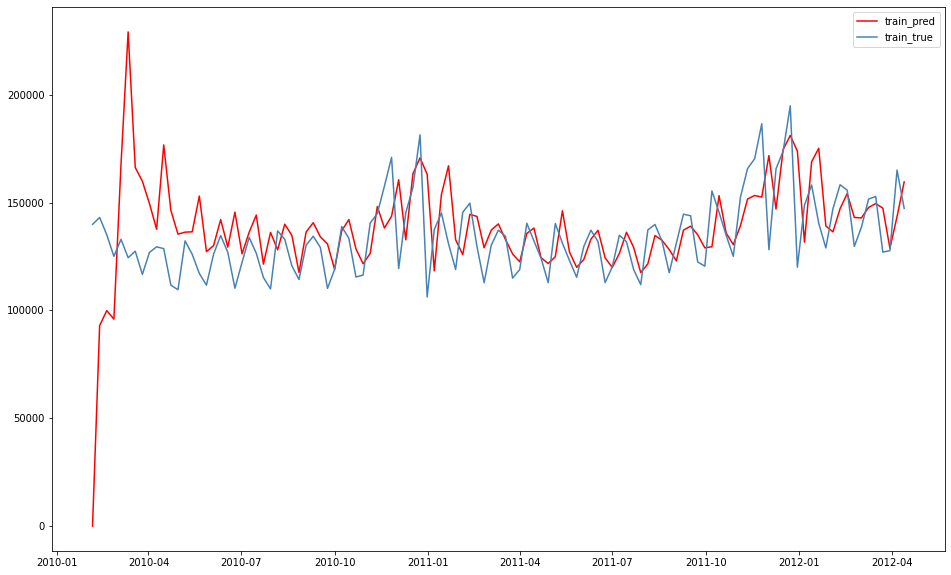

In [33]:
df_data_train = ts2.data
df_train_pred = pd.Series(arima_model1.predict_in_sample(), index = df_data_train.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_train_pred, label='train_pred', color='red')
plt.plot(ts2.data, label='train_true', color='steelblue')
plt.legend()

In [34]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 16090.835350837146,
 'MAPE': 0.12317927952158783,
 'MSE': 627659501.5213935,
 'over_est_0': 0.6521739130434783,
 'under_est_0': 0.34782608695652173,
 'R2': -1.1020692761247934}

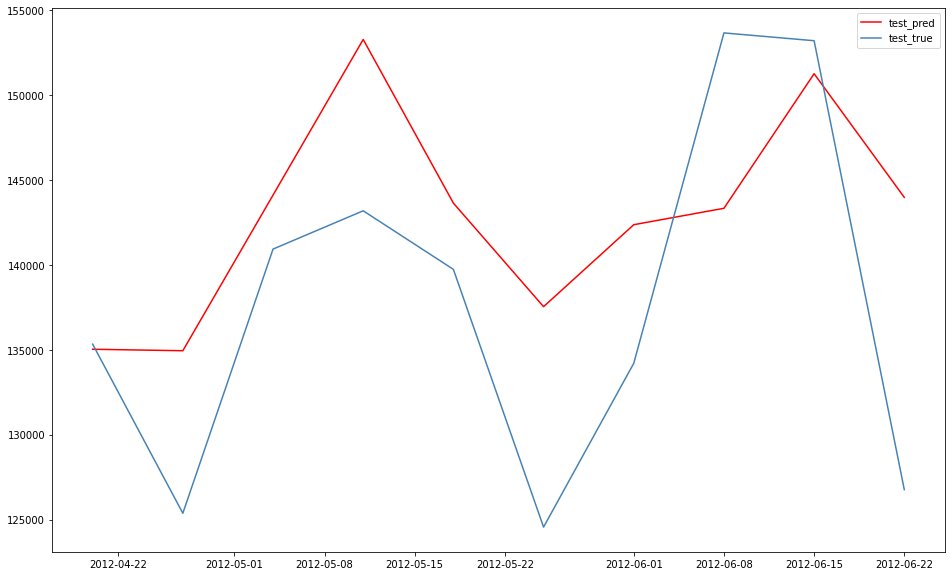

In [37]:
n_test = 10

df_data_test = ts2.data_test[:n_test]
df_test_pred = pd.Series(arima_model1.predict(n_periods=len(df_data_test)), index = df_data_test.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [38]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 7771.363747971378,
 'MAPE': 0.05805442204686453,
 'MSE': 86163676.1146479,
 'over_est_0': 0.7,
 'under_est_0': 0.3,
 'R2': 0.14094009875709068}

 ARIMA(0,1,2)(2,1,1)[5]             : AIC=2489.177, Time=0.23 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=2474.375, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=2501.385, Time=0.12 sec
 ARIMA(1,1,1)(2,1,1)[5]             : AIC=inf, Time=0.59 sec
 ARIMA(2,1,0)(1,1,2)[5]             : AIC=2479.776, Time=0.28 sec
 ARIMA(3,1,0)(0,1,1)[5]             : AIC=2453.863, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,1,0)[5]             : AIC=2511.138, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[5]             : AIC=2514.681, Time=0.04 sec
 ARIMA(0,1,4)(0,1,0)[5]             : AIC=2495.417, Time=0.14 sec
 ARIMA(0,1,3)(0,1,2)[5]             : AIC=2488.275, Time=0.30 sec
 ARIMA(0,1,4)(1,1,0)[5]             : AIC=2480.862, Time=0.17 sec
 ARIMA(0,1,3)(2,1,0)[5]             : AIC=2498.180, Time=0.31 sec
 ARIMA(1,1,0)(1,1,2)[5]             : AIC=2494.447, Time=0.30 sec
 ARIMA(2,1,1)(0,1,0)[5]             : AIC=2530.548, Time=0.06 sec
 ARIMA(1,1,3)(0,1,1)